In [116]:
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np

In [129]:
# historical, historicalGHG, historicalMisc

file_dict = {}

file_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
                         '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
                         None]

file_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Oyr/pe/gn/v20120718/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Oyr/pe/gn/v20111027/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Oyr/pe/gn/v20111028/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

file_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Oyr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Oyr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200912-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Oyr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

In [125]:
def get_data(infile):
    """Get the data for a particular model"""
    
    cube = iris.load_cube(infile, 'precipitation minus evaporation flux')
    iris.coord_categorisation.add_year(cube, 'time')
    anomaly_data = cube.data - cube.data[0, :]
    
    return cube, anomaly_data

In [126]:
def plot_data(model):
    """Create the plot"""

    hist_file, ghg_file, aa_file = file_dict[model]
    
    hist_cube, hist_anomaly_data = get_data(hist_file)
    ghg_cube, ghg_anomaly_data = get_data(ghg_file)
    if aa_file:
        aa_cube, aa_anomaly_data = get_data(aa_file)
    else:
        aa_cube = aa_anomaly_data = None
    
    fig = plt.figure(figsize=[16,12])
    ax0 = plt.subplot2grid((3,6), (0,2), colspan=2)
    ax1 = plt.subplot2grid(shape=(3,6), loc=(1,0), colspan=2)
    ax2 = plt.subplot2grid((3,6), (1,2), colspan=2)
    ax3 = plt.subplot2grid((3,6), (1,4), colspan=2)
    ax4 = plt.subplot2grid((3,6), (2,1), colspan=2)
    ax5 = plt.subplot2grid((3,6), (2,3), colspan=2)

    xvals = [0, 1, 2, 3, 4]
    ax0.bar(xvals, hist_cube.data[0, :], color='0.5')
    ax0.set_ylabel('kg')
    ax0.set_xticklabels(['', 'SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax0.set_title('Year One')

    hist_years = hist_cube.coord('year').points
    ghg_years = ghg_cube.coord('year').points
    if aa_cube:
        aa_years = aa_cube.coord('year').points
    
    max_value = np.abs(ghg_anomaly_data).max() * 1.1

    ax1.plot(ghg_years, ghg_anomaly_data[:,0], color='red', label='GHG-only')
    ax1.plot(hist_years, hist_anomaly_data[:,0], color='black', label='historical')
    if aa_cube:
        ax1.plot(aa_years, aa_anomaly_data[:,0], color='blue', label='AA-only')
    ax1.set_title('SH precip')
    ax1.set_ylabel('kg')
    ax1.set_ylim([-max_value, max_value])
    ax1.grid(True, color='0.8', linestyle='--')
    ax1.legend()

    ax4.plot(ghg_years, ghg_anomaly_data[:,1], color='red', label='GHG-only')
    ax4.plot(hist_years, hist_anomaly_data[:,1], color='black', label='historical')
    if aa_cube:
        ax4.plot(aa_years, aa_anomaly_data[:,1], color='blue', label='AA-only')
    ax4.set_title('SH evap')
    ax4.set_ylabel('kg')
    ax4.set_ylim([-max_value, max_value])
    ax4.grid(True, color='0.8', linestyle='--')

    ax2.plot(ghg_years, ghg_anomaly_data[:,2], color='red', label='GHG-only')
    ax2.plot(hist_years, hist_anomaly_data[:,2], color='black', label='historical')
    if aa_cube:
        ax2.plot(aa_years, aa_anomaly_data[:,2], color='blue', label='AA-only')
    ax2.set_title('tropical precip')
    ax2.set_ylim([-max_value, max_value])
    ax2.grid(True, color='0.8', linestyle='--')

    ax5.plot(ghg_years, ghg_anomaly_data[:,3], color='red', label='GHG-only')
    ax5.plot(hist_years, hist_anomaly_data[:,3], color='black', label='historical')
    if aa_cube:
        ax5.plot(aa_years, aa_anomaly_data[:,3], color='blue', label='AA-only')
    ax5.set_title('NH evap')
    ax5.set_ylim([-max_value, max_value])
    ax5.grid(True, color='0.8', linestyle='--')

    ax3.plot(ghg_years, ghg_anomaly_data[:,4], color='red', label='GHG-only')
    ax3.plot(hist_years, hist_anomaly_data[:,4], color='black', label='historical')
    if aa_cube:
        ax3.plot(aa_years, aa_anomaly_data[:,4], color='blue', label='AA-only')
    ax3.set_title('NH precip')
    ax3.set_ylim([-max_value, max_value])
    ax3.grid(True, color='0.8', linestyle='--')

    #ax3.set_yticks([])
    fig.tight_layout()
    plt.show()

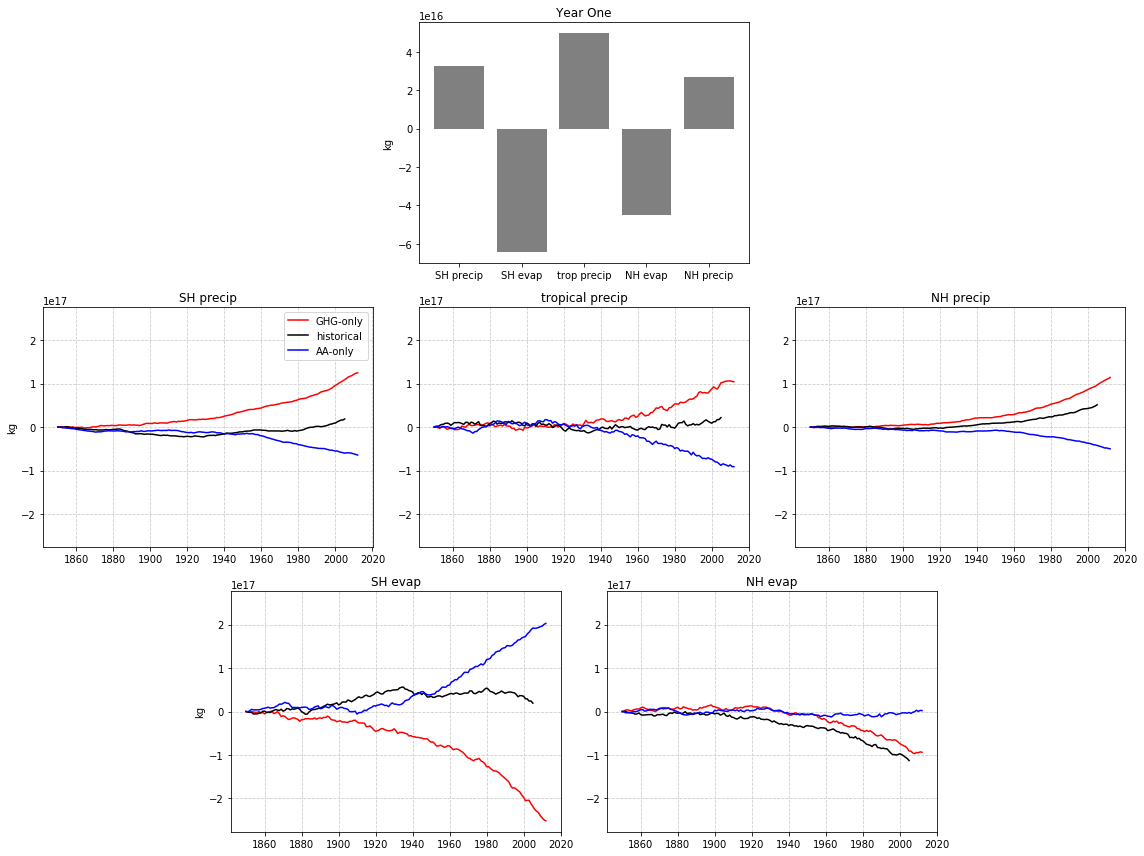

In [127]:
plot_data('CanESM2')

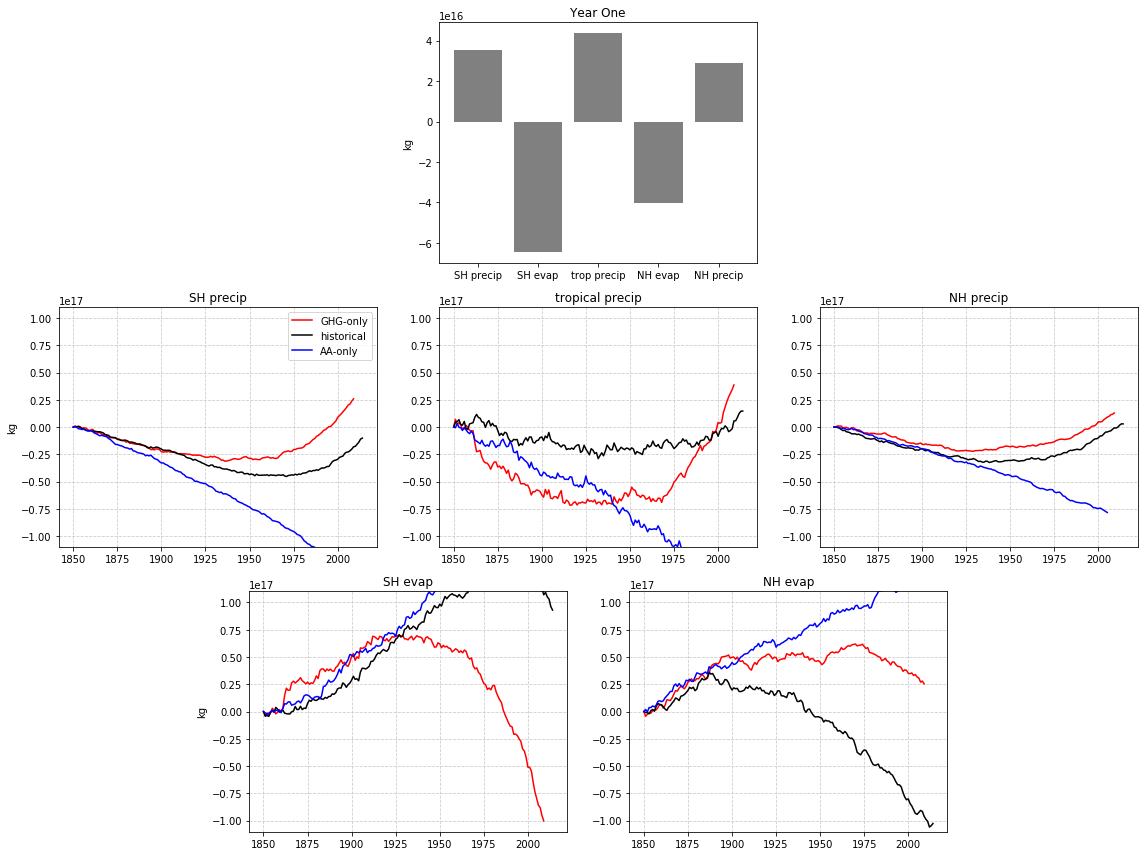

In [132]:
plot_data('FGOALS-g2')

Try removing the actual accumulated piControl, not a cubic fit? (Try some other models first and come back to this one.)

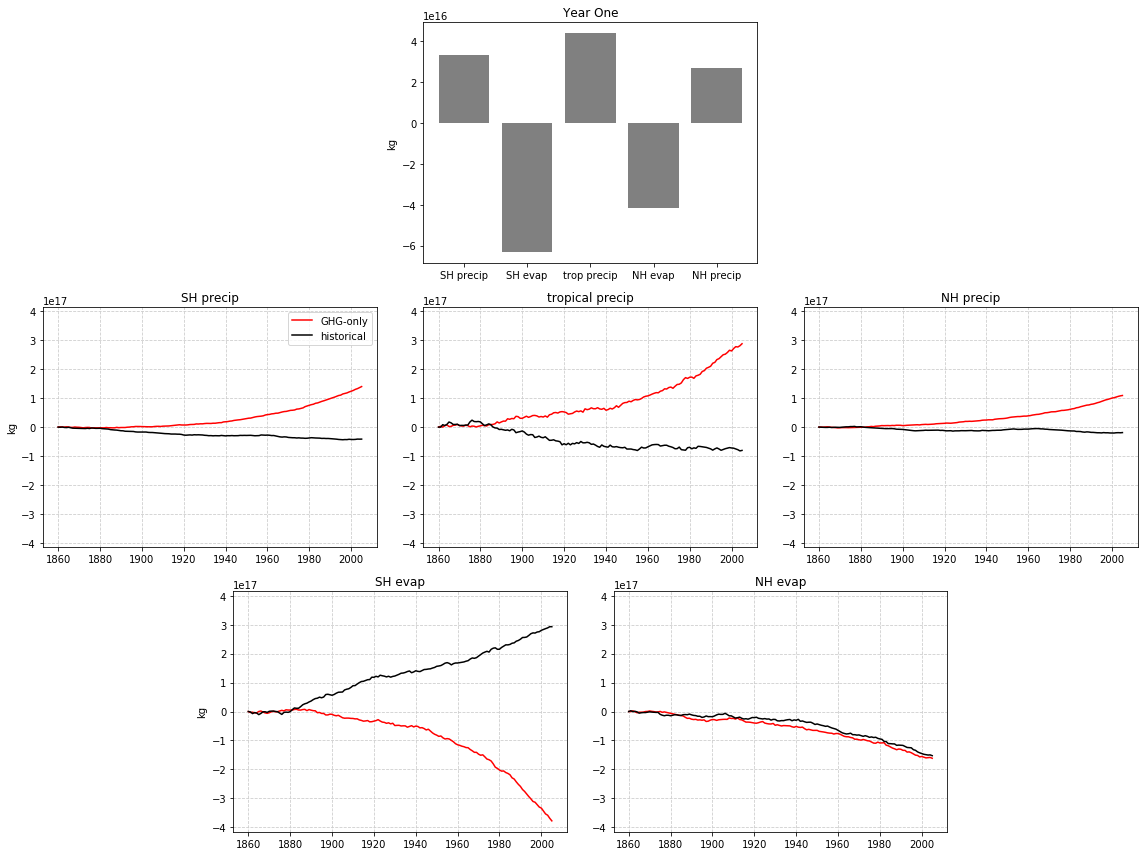

In [128]:
plot_data('GFDL-CM3')